<a href="https://colab.research.google.com/github/Sergeichik/MLDM-2023/blob/main/01-intro/DataHandling_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name: Vladimir

Last Name: Sergeychik

Group: М02-309в

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [PlaZMaD](https://github.com/plazmad) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2023-09-18 11:50:11--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.008s  

2023-09-18 11:50:11 (7.63 MB/s) - ‘train.csv’ saved [60302/60302]



In [41]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [38]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)
# <YOUR CODE>
grouped = (data.groupby('Pclass')['Survived'].sum())/(data.groupby('Pclass')['Survived'].count())
print(grouped)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Task 2 (1 point)

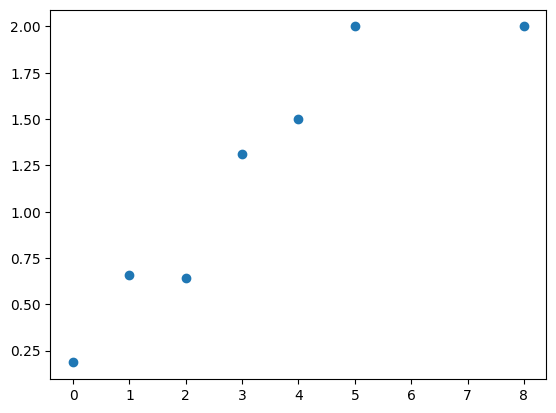

In [75]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

# <YOUR CODE>
import matplotlib.pyplot as plt
import numpy as np
x = np.array(data.groupby('SibSp')['Parch'].sum())/(data.groupby('SibSp')['Parch'].count()) #to group by a number of siblings and to count the average number of parents
y = np.array(list(set(data['SibSp']))) #to create an array of unique siblings numbers
plt.scatter(y, x)
plt.show()

## Task 3 (2 points)

In [197]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[["Pclass", "Parch"]].copy()
  features["Pclass"] /=features["Pclass"].mean()
  return features

model = KNeighborsClassifier(
    n_neighbors=4
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]


model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.77


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

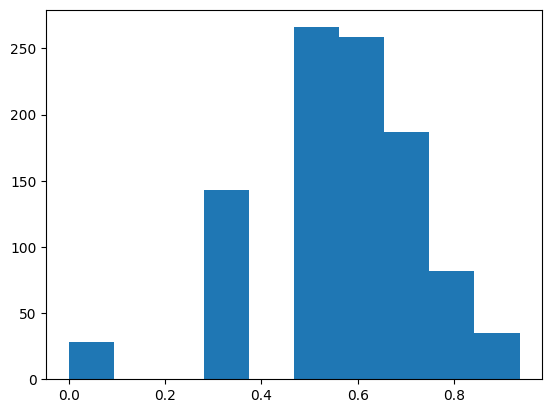

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x = feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1))
y = data_train['Survived']
test_errors = list()
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.01, random_state=i)

    # fit the model
    model.fit(X_train,  y_train)

    # make the prediction
    test_predictions = model.predict(X_test)
    test_errors.append(np.sqrt(mean_squared_error(y_test,test_predictions)))
plt.hist(test_errors)
plt.show()

# <YOUR CODE>